# TABLE OF CONTENTS
1. [PROBLEM STATEMENT](#prob-stat)
2. [THE DATA](#data)
    1. [Supplemental Data - Olympic](#supdata-olympic)
3. [BACKGROUND AND FINDING](#finding)
4. [READ IN THE DATA](#read)
    1. [Reading Olympic .csv files](#read_olympic) 
    2. [GETTING TO KNOW THE DATA](#know)
5. [DATA PREPARATION](#prepare)
    1. [Happy 2016 Dataframe](#happy-2016)
        1. [Rename Key Column](#rename_col_2016)
    2. [Happy 2017 Dataframe](#happy-2017)
        1. [Rename Key Column](#rename_col_2017)
        2. [Align country name](#col_2017)
    3. [Athletes Dataframe](#athletes)
        1. [Data Selection](#select_athletes) 
        2. [Create Medal Count for analysis purpose](#create_col_athletes)
    4. [Countries Dataframe](#countries)
        1. [Data Selection](#select_class)
        2. [Create Key Column](#create_col_class)
        3. [Sync nationality between Country and Medals](#sync_national) 
6. [COMBINE THE DATASETS](#combine)
    1. [Combine dataset-happiness data](#combine_happy)
    2. [Combine dataset-Olympic Game data](#combine_olympic)
    3. [Combine dataset-Happiness Clean and Olympic Clean](#combine_happy_olymic) 
    
*** TBC ***
7. [FIND CORRELATIONS](#find_corr)
    1. [Correlations Plots](#corr_plots)
        1. [Positive Correlations Plot](#pos_corr_plot)
        1. [Negative Correlations Plot](#neg_corr_plot)
    2. [Correlations Analysis](#corr_analysis)

# PROBLEM STATEMENT<a id='prob-stat'></a>

We would like to explorer whether the world happiest index in 2016 and 2017 has any correlation with Olympic Game 2016

In this project, we'll collect the raw data from Olympic game 206 and the world happiest index on the years 2016 and year 2017.
We will then perform data cleaning, table join, and aggregation before analysing. 

Our team members of Group 6: Ashley Keung, Jill Lau, Jonathan Chu and Billy Choy

***

# THE DATA<a id='data'></a>

The World Happiness Report is a United Nations Sustainable Development Solutions Network publication. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various life factors. As of March 2021, Finland had been ranked the happiest country in the world four times in a row.

The happiness index files are made available by World Happiest Report on the Kaggle website https://www.kaggle.com/unsdsn/world-happiness. So let's create a new directory named "happiness" in our project directory and download these two files in the directory. Also, for the sake of brevity, let's rename the data files as "Happiness_2016.csv" and "Happiness_2017.csv", respectively. A concise description of our primary datasets is as follows:

Main datasets:
- __Happiness_2016.csv__ - World Happiest Index in 2016
- __Happiness_2017.csv__ - World Happiest Index in 2017

Now let's go ahead and have a look at these datasets.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
#Read Happiness_2016 csv and store as happy_2016 dataframe
happy_2016 = pd.read_csv("Happiness_2016.csv")
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
#Read Happiness_2017 csv and store as happy_2017 dataframe
happy_2017 = pd.read_csv("Happiness_2017.csv")
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


We can see that happy_2016 has 13 columns while happy_2017 has 12 columns. Even though the exact measurements are between years, some column names changed, and one column (Region) is missing in 2017. Data cleansing is required before our analysis.

On the other hand, we would like to explore the happiness and related index before and after the Olympic games in 2016. Consequently, we must supplement the Olympic Games 2016 to complete the analysis.

***

# Supplemental Data - Olympic<a id='supdata-olympic'></a>

The Kaggle website https://www.kaggle.com/rio2016/olympic-games, "2016 Olympics in Rio de Janeiro", has several related datasets on Olympic Games 2016. So let's also download these files and their associated metadata files in the "Olympic" directory.

The data files and their descriptions are as follows:

Supplemental datasets:

- __athletes.csv__ - This file contains Athlete information, including the name, nationality, gender (sex), date of birth(dob), height, weight, type of sports, the number of gold medal, silver medal, and bronze medal.
- __countries.csv__ - This file contain country name, code, population and GDP per capital.

***

# BACKGROUND AND FINDING<a id='finding'></a>

So let's do some background research on Google before moving on to coding, as this will help us understand how to combine and analyze the data.

In this case, we'll want to research the following:

    Olympic Game 2016
    World Happiest Index 2016
    World Happiest Index 2017

Based on our research on each of the topics as mentioned above and an examination of the metadata file associated with each dataset, we can state the following:

- Olympic Games, 2016, has 201 countries joined the game. 
- World Happiest Index 2016 has a rating of 157 countries.
To analyze the Happiest Index change, we will use the countries from the World Happiest Index as a base to match with the country in the Olympic Games.
- On the other hand, the linkage between Olympic files are:
    - Countries.[code] link up with Athlete.[nationality]

Now the assumptions are all set up. We are ready to examine the data. Since all of these datasets are interrelated, we'll need to combine them into a single data set before finding correlations.

***

# READ IN THE DATA<a id='read'></a>

## Reading .csv files of Olympic Game<a id='read_olympic'></a>

Let's read the Olympic game CSV files with the command below.

In [5]:
#import olympic data
athletes = pd.read_csv("athletes.csv")
countries = pd.read_csv("countries.csv")

Our primary analysis uses Happiest Index as a base, and we store Olympic related tables with the data frame named above for later usage. The ideal key to join both datasets will be the country code.

## GETTING TO KNOW THE DATA<a id='know'></a>

Now it's about to explore each of the individual datasets we stored into a central repository (the dictionary) above. We will also closely examine the Excel metadata file associated with each data file. This will ensure no gaps in our understanding of the data, such as thinking that a column represents something other than what it does.

In [6]:
#Check athletes data frame with header record
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


By looking at the Athlete dataset, it tells us:
 1. 'ID' is a unique assigned key that ideally can join with an events data frame.
 2. Nationality refers to a country's short form to map with code in the country's data frame.
 3. 'dob refers to the date of birth which is not a unique variable.
 4. 'Sport' refers to the type of sport that can join with an events data frame.

In [7]:
#Check countries data frame with header record
countries.head()

,country,code,population,gdp_per_capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


Country data frame shows the country name with national code, population and GDP per capital.
By looking at the first five records, gdp_per_capita which contains a Null value may need to be handled later on.

***

# DATA PREPARATION<a id='prepare'></a>

We'll now look at each dataset one by one to see more details about the data contained in each column and its type. To do this, we'll import a custom function from a module we wrote in another project.

## Happy 2016 Dataframe <a id='happy-2016'></a>

Let's look into the Happy 2016 Dataframe in detail, starting with a data type check on all columns.

In [8]:
#Check Data type in Happy_2016 data frame
happy_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

After checking the data type, there is no casting required for this data frame.

### Rename Key Column <a id='rename_col_2016'></a>

As mentioned earlier, column names are different in happy_2016 and happy_2017. All column names must align on both datasets to perform data checking. After checking the data type, there is no casting required for this data frame.

In [9]:
#rename happy_2016 column names
#This transformation take care of space and bracket
happy_2016 = happy_2016.rename(
    columns={'Happiness Rank': 'Happiness_Rank', 
             'Happiness Score': 'Happiness_Score', 
             'Lower Confidence Interval': 'Lower_Confidence_Interval', 
             'Upper Confidence Interval': 'Upper_Confidence_Interval',
             'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 
             'Health (Life Expectancy)': 'Health_Life Expectancy', 
             'Trust (Government Corruption)': 'Trust_Government_Corruption', 
             'Dystopia Residual': 'Dystopia_Residual'})

In [10]:
#Validate the results
happy_2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

## Happy 2017 Dataframe<a id='happy-2017'></a>

Let's look into the Happy 2017 Dataframe in detail, starting with a data type check on all columns.

In [11]:
#Check Data type in Happy_2017 data frame
happy_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

After checking the data type, there is no casting required for this data frame.

### Rename Key Column<a id='rename_col_2017'></a>

Similar to the previous session, the year_2017 dataset almost requires data cleansing on column names.

In [12]:
#rename happy_2017 column names
#This transformation take care of space and bracket
happy_2017 = happy_2017.rename(
    columns={'Happiness.Rank': 'Happiness_Rank', 
             'Happiness.Score': 'Happiness_Score', 
             'Whisker.low': 'Lower_Confidence_Interval', 
             'Whisker.high': 'Upper_Confidence_Interval',
             'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita', 
             'Health..Life.Expectancy.': 'Health_Life Expectancy', 
             'Trust..Government.Corruption.': 'Trust_Government_Corruption', 
             'Dystopia.Residual': 'Dystopia_Residual'})

In [13]:
#double check result
happy_2017.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Upper_Confidence_Interval', 'Lower_Confidence_Interval',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

### Align country name  <a id='col_2017'></a>

There are value different on Country in year 2016 and 2017, by using the diff functions. We found.
- Hong Kong
- Taiwan

In [14]:
#locate the difference of Country between happy_2016 and happy_2017
set(happy_2016['Country'].unique())-set(happy_2017['Country'].unique())

{'Comoros',
 'Hong Kong',
 'Laos',
 'Puerto Rico',
 'Somaliland Region',
 'Suriname',
 'Taiwan'}

In [15]:
#locate the difference of Country between happy_2017 and happy_2016
set(happy_2017['Country'].unique())-set(happy_2016['Country'].unique())

{'Central African Republic',
 'Hong Kong S.A.R., China',
 'Lesotho',
 'Mozambique',
 'Taiwan Province of China'}

In [16]:
#rename the Country names which should be matched
happy_2017['Country'][happy_2017['Country'] == 'Taiwan Province of China']  = 'Taiwan'
happy_2017['Country'][happy_2017['Country'] == 'Hong Kong S.A.R., China']  = 'Hong Kong'

<ipython-input-16-81b6ba741fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_2017['Country'][happy_2017['Country'] == 'Taiwan Province of China']  = 'Taiwan'
<ipython-input-16-81b6ba741fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_2017['Country'][happy_2017['Country'] == 'Hong Kong S.A.R., China']  = 'Hong Kong'


In [17]:
#check the renaming result
set(happy_2017['Country'].unique())-set(happy_2016['Country'].unique())

{'Central African Republic', 'Lesotho', 'Mozambique'}

## Athletes Dataframe<a id='athletes'></a>

Examine the Athlete table and check on its columns.

In [18]:
#Check Data type in Happy_2016 data frame
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

### Data Selection<a id='select_athletes'></a>

For our analysis purpose, we only focus on several dataset columns. We create a subset of data with Nationality, gold, silver, bronze for analysis usage.

In [19]:
#Create subset of dataframe athlete1 which only contains 4 columns below
athletes1 = athletes[["nationality","gold","silver","bronze"]]

### Create Medal Count for analysis purpose<a id='create_col_athletes'></a>

Since our analysis is on the country level, athlete tables contain multiple records per nationality; we provide a grouping by nationality and medal count for further analysis.

In [20]:
#Create medals counts from athletes1 dataframe with group up nationality
medals = athletes1.groupby(by='nationality', axis=0, as_index=False).sum()

#Create new series as total medal onto the medals dataset
medals['total_medals'] = medals['gold'] + medals['silver'] + medals['bronze']

In [21]:
#Check Medal table after transformation
medals.head()

,nationality,gold,silver,bronze,total_medals
0,AFG,0,0,0,0
1,ALB,0,0,0,0
2,ALG,0,2,0,2
3,AND,0,0,0,0
4,ANG,0,0,0,0


## Countries Dataframe<a id='countries'></a>

In [22]:
#Check on the countries data type
countries.dtypes

country            object
code               object
population        float64
gdp_per_capita    float64
dtype: object

### Sync nationality between Country and Medals <a id='sync_national'></a>

In [23]:
#find out if there is any unmatch nationality and country between medals and countries
set(medals['nationality'].unique())-set(countries['code'].unique())

{'IOA', 'KIR', 'KOS', 'MHL', 'MNE', 'ROT', 'ROU', 'SRB', 'SSD', 'TTO', 'TUV'}

In [24]:
#find out if there is any unmatch nationality and country between countries and medals
set(countries['code'].unique())-set(medals['nationality'].unique())

{'AHO', 'KUW', 'ROM', 'SCG', 'TRI'}

In [25]:
extra_countries1 = {'country': 'Independent Olympic Athletes', 'code':'IOA' }
extra_countries2 = {'country': 'Kiribati', 'code':'KIR' }
extra_countries3 = {'country': 'Kosovo', 'code':'KOS' }
extra_countries4 = {'country': 'Marshall Islands', 'code':'MHL' }
extra_countries5 = {'country': 'Montenegro', 'code':'MNE' }
extra_countries6 = {'country': 'Refugee Olympic Team', 'code':'ROT' }
extra_countries7 = {'country': 'Romania', 'code':'ROU' }
extra_countries8 = {'country': 'Serbia', 'code':'SRB' }
extra_countries9 = {'country': 'South Sudan', 'code':'SSD' }
extra_countries10 = {'country': 'Trinidad and Tobago', 'code':'TTO' }
extra_countries11 = {'country': 'Tuvalu', 'code':'TUV' }

countries = countries.append(extra_countries1, ignore_index=True)
countries = countries.append(extra_countries2, ignore_index=True)
countries = countries.append(extra_countries3, ignore_index=True)
countries = countries.append(extra_countries4, ignore_index=True)
countries = countries.append(extra_countries5, ignore_index=True)
countries = countries.append(extra_countries6, ignore_index=True)
countries = countries.append(extra_countries7, ignore_index=True)
countries = countries.append(extra_countries8, ignore_index=True)
countries = countries.append(extra_countries9, ignore_index=True)
countries = countries.append(extra_countries10, ignore_index=True)
countries = countries.append(extra_countries11, ignore_index=True)

In [26]:
#check if the countries table is updated
len(countries)

212

In [27]:
#double check the update of nationality 
countries[countries["code"].str.
          contains("IOA|KIR|KOS|MHL|MNE|ROT|ROU|SRB|SSD|TTO|TUV")]

,country,code,population,gdp_per_capita
201,Independent Olympic Athletes,IOA,NaN,NaN
202,Kiribati,KIR,NaN,NaN
203,Kosovo,KOS,NaN,NaN
204,Marshall Islands,MHL,NaN,NaN
205,Montenegro,MNE,NaN,NaN
206,Refugee Olympic Team,ROT,NaN,NaN
207,Romania,ROU,NaN,NaN
208,Serbia,SRB,NaN,NaN
209,South Sudan,SSD,NaN,NaN
210,Trinidad and Tobago,TTO,NaN,NaN


***

# COMBINE THE DATASETS<a id='combine'></a>

Finally, we can now manipulate the data frame above and turn them into meaningful datasets. Before starting the merge, let's quickly visualize the number of rows in each cleaned dataset, which can help us decide which join strategies (left, right, inner, or outer).

To perform correlation, here have three datasets required as below: 
- Blend two sets of happiness data together - happy_2016 + happy_2017
- Join Olympic Game tables into one data frame - countries + medals (aggregated from athletes)
- Combine the above two tables for correlation analysis

We will discuss these steps one by one.

## 1.Combine dataset - happiness data <a id='combine_happy'></a>

After cleaning the happiness data, we could first check for the row count of the key (country) from both tables.

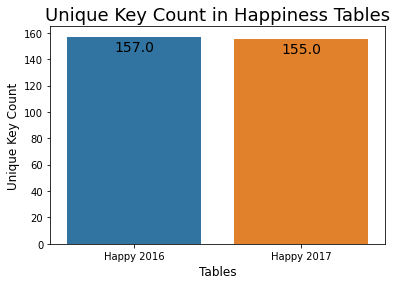

In [28]:
table = ['Happy 2016','Happy 2017']
unique_key = [happy_2016['Country'].nunique(),happy_2017['Country'].nunique()]
plots = sns.barplot(x=table, y=unique_key)
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, -10),
                   textcoords='offset points')
plt.xlabel("Tables", size=12)
plt.ylabel("Unique Key Count", size=12)
plt.title("Unique Key Count in Happiness Tables", size=18)
plt.show()

The critical value count on both tables is unmatched. We could take a closer look at the unmatched value before merging them.

In [29]:
set(happy_2016['Country'].unique())-set(happy_2017['Country'].unique())

{'Comoros', 'Laos', 'Puerto Rico', 'Somaliland Region', 'Suriname'}

In [30]:
set(happy_2017['Country'].unique())-set(happy_2016['Country'].unique())

{'Central African Republic', 'Lesotho', 'Mozambique'}

From the result above, we notice that both tables have unmatched countries. The odd columns are around __5% of the total row counts__. We would decide to keep all data first to try to match the Olympic Game data in a later stage. Therefore, we will merge the happiness data "happy_2016" and "happy_2017" into "happy_compare_clean" by using outer join to keep all the data first.

In [80]:
happy_compare_clean = pd.merge(happy_2016, happy_2017, 
                               how='outer', on='Country', 
                               suffixes=('_2016', '_2017'))
##check any duplicated rows
len(happy_compare_clean) - happy_compare_clean['Country'].nunique()

0

***

## 2. Combine dataset - Olympic Game data<a id='combine_olympic'></a>

There are two tables source from Olympic Game,  "athletes" and "countries". From the cleaning process, we aggregated the "athletes" data into "medals", so we would try to combine the "medals" and "countries" tables.

First of all, we should define the key in both tables. In this case, the key is that two tables are not in the same name. The key of the two tables are as follow:
- Medals table -> nationality
- Countries table -> code

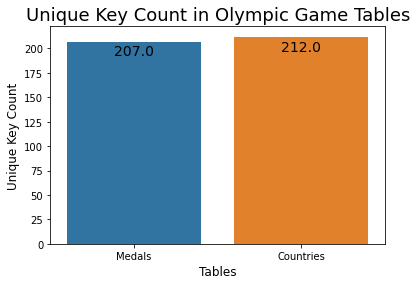

In [32]:
table = ['Medals','Countries']
unique_key = [medals['nationality'].nunique(),countries['code'].nunique()]
plots = sns.barplot(x=table, y=unique_key)
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, -10),
                   textcoords='offset points')
plt.xlabel("Tables", size=12)
plt.ylabel("Unique Key Count", size=12)
plt.title("Unique Key Count in Olympic Game Tables", size=18)
plt.show()

The critical value count of both tables are unmatched, and we could take a closer look before merging them.

In [33]:
set(medals['nationality'].unique())-set(countries['code'].unique())

set()

In [34]:
set(countries['code'].unique())-set(medals['nationality'].unique())

{'AHO', 'KUW', 'ROM', 'SCG', 'TRI'}

From the result of the above checking, we notice that there is unmatched countries appearted in countries table. The odd columns are around __2% of the total row counts__. However, we would only consider the countries with medals. The countries are not appearing on the medals table can be ignored. Therefore, we will merge the Olympic data "medals" and "countries" into "Olympic" by using left join to keep all the medal related data first.

In [35]:
olympic = pd.merge(medals, countries, how='left', 
                   left_on='nationality', right_on='code')
##check any duplicated rows
len(olympic) - olympic['nationality'].nunique()

0

***

### 3. Combine dataset - Happiness Clean and Olympic Clean <a id='combine_happy_olymic'></a>

We combine the previous two clean datasets into a single dataset for analysis and correlation check. Let's check on the value count on both data set, and we are using the country value for mapping purposes.

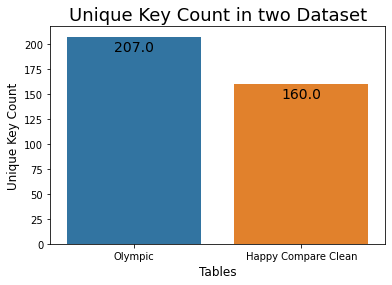

In [36]:
table = ['Olympic','Happy Compare Clean']
unique_key = [olympic['country'].nunique(),happy_compare_clean['Country'].nunique()]
plots = sns.barplot(x=table, y=unique_key)
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, -10),
                   textcoords='offset points')
plt.xlabel("Tables", size=12)
plt.ylabel("Unique Key Count", size=12)
plt.title("Unique Key Count in two Dataset", size=18)
plt.show()

The critical value count of both tables are mismatched, and let investigate before further actions.

In [37]:
set(olympic['country'].unique())-set(happy_compare_clean['Country'].unique())

{'American Samoa*',
 'Andorra',
 'Antigua and Barbuda',
 'Aruba*',
 'Bahamas',
 'Barbados',
 'Bermuda*',
 'British Virgin Islands',
 'Brunei',
 'Burma',
 'Cape Verde',
 'Cayman Islands*',
 'Congo',
 'Congo, Dem Rep',
 'Cook Islands',
 "Cote d'Ivoire",
 'Cuba',
 'Djibouti',
 'Dominica',
 'East Timor (Timor-Leste)',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gambia',
 'Grenada',
 'Guam',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong*',
 'Independent Olympic Athletes',
 'Kiribati',
 'Korea, North',
 'Korea, South',
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Micronesia',
 'Monaco',
 'Nauru',
 'Oman',
 'Palau',
 'Palestine, Occupied Territories',
 'Papua New Guinea',
 'Puerto Rico*',
 'Refugee Olympic Team',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'Swaziland',
 'Tonga',
 'Tuvalu',
 'Vanuatu',
 'Virgin Islands*'}

In [38]:
set(happy_compare_clean['Country'].unique())-set(olympic['country'].unique())

{'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Hong Kong',
 'Ivory Coast',
 'Kuwait',
 'Myanmar',
 'North Cyprus',
 'Palestinian Territories',
 'Puerto Rico',
 'Somaliland Region',
 'South Korea'}

From the result above, we notice that both tables have unmatched countries. The unmatched columns are around __23% of the total row counts__. We need further cleansing before joining two tables.

### Data cleansing before correlation

After the investigation, some country names do not match on both datasets; for instance, Congo is used in Olympic while happiness uses Congo(Brazzaville). We will perform another data cleansing before combining these datasets.

List of unmatch country that should be match:
- 'Congo' in olympic Congo(Brazzaville) in happy_compare_clean
- 'Congo, Dem Rep' in olympic vs Congo(Kinshasa) in happy_compare_clean
- Hong Kong* in olympic vs Hong Kong in happy_compare_clean
- Puerto Rico* in olympic vs Puerto Rico in happy_compare_clean
- Korea, South in olympic vs South Korea in happy_compare_clean

1. Update the unmatched countries name

In [39]:
#Update Congo
olympic['country'][olympic['country'] == 'Congo']  = 'Congo (Brazzaville)'
olympic['country'][olympic['country'] == 'Congo, Dem Rep']  = 'Congo (Kinshasa)'
#Korea, South in olympic vs South Korea in happiness_2016
olympic['country'][olympic['country'] == 'Korea, South']  = 'South Korea'

<ipython-input-39-18ef0f027dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic['country'][olympic['country'] == 'Congo']  = 'Congo (Brazzaville)'
<ipython-input-39-18ef0f027dd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic['country'][olympic['country'] == 'Congo, Dem Rep']  = 'Congo (Kinshasa)'
<ipython-input-39-18ef0f027dd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic['country'][olympic['country'] ==

In [40]:
#Validation check after remove asterisk
olympic[olympic["country"].str.
          contains("Hong Kong|Puerto Rico")] 

,nationality,gold,silver,bronze,total_medals,country,code,population,gdp_per_capita
81,HKG,0,0,0,0,Hong Kong*,HKG,7305700.0,42327.839957
154,PUR,1,0,0,1,Puerto Rico*,PUR,3474182.0,NaN


In [41]:
# Validation check on South Korea
olympic[olympic['country'] == 'South Korea']

,nationality,gold,silver,bronze,total_medals,country,code,population,gdp_per_capita
102,KOR,13,3,10,26,South Korea,KOR,50617045.0,27221.524051


2. Remove asterisk ('*') from the country name

In [42]:
#solve problems of #Hong Kong* in olympic vs Hong Kong in happiness_2016 & 
#Puerto Rico* in olympic vs Puerto Rico in happiness_2016
olympic['country'] = olympic['country'].str.rstrip('*')

After further cleaning on the data, we could join the tables together now. As we would like to compare the countries with Happiness data and Olympic together, we choose to use inner join to merge them together to keep the data existing in both tables only. 

In [43]:
olympic_corr = pd.merge(olympic, happy_compare_clean, how='inner', 
                        left_on='country', right_on='Country')
##check any duplicated rows
len(olympic_corr) - olympic_corr['country'].nunique()

0

After all the cleansing, we can now merge both tables into olympic_corr for data analysis.

First, check all the column names.

In [44]:
olympic_corr.columns

Index(['nationality', 'gold', 'silver', 'bronze', 'total_medals', 'country',
       'code', 'population', 'gdp_per_capita', 'Country', 'Region',
       'Happiness_Rank_2016', 'Happiness_Score_2016',
       'Lower_Confidence_Interval_2016', 'Upper_Confidence_Interval_2016',
       'Economy_GDP_per_Capita_2016', 'Family_2016',
       'Health_Life Expectancy_2016', 'Freedom_2016',
       'Trust_Government_Corruption_2016', 'Generosity_2016',
       'Dystopia_Residual_2016', 'Happiness_Rank_2017', 'Happiness_Score_2017',
       'Upper_Confidence_Interval_2017', 'Lower_Confidence_Interval_2017',
       'Economy_GDP_per_Capita_2017', 'Family_2017',
       'Health_Life Expectancy_2017', 'Freedom_2017', 'Generosity_2017',
       'Trust_Government_Corruption_2017', 'Dystopia_Residual_2017'],
      dtype='object')

In [45]:
olympic_corr['Country'].isna().sum()

0

In [46]:
olympic.sort_values(by='total_medals',ascending=False)

,nationality,gold,silver,bronze,total_medals,country,code,population,gdp_per_capita
198,USA,139,54,71,264,United States,USA,3.214188e+08,56115.718426
72,GER,49,44,67,160,Germany,GER,8.141314e+07,41313.313995
68,GBR,64,55,26,145,United Kingdom,GBR,6.513823e+07,43875.969614
159,RUS,52,29,34,115,Russia,RUS,1.440968e+08,9092.580536
38,CHN,46,30,37,113,China,CHN,1.371220e+09,8027.683810
...,...,...,...,...,...,...,...,...,...
94,IVB,0,0,0,0,British Virgin Islands,IVB,3.011700e+04,NaN
100,KGZ,0,0,0,0,Kyrgyzstan,KGZ,5.957000e+06,1103.215352
101,KIR,0,0,0,0,Kiribati,KIR,NaN,NaN
1,ALB,0,0,0,0,Albania,ALB,2.889167e+06,3945.217582


### Missing Data<a id='missing_combined'></a>

In [47]:
#check missing data of every columns
olympic_corr.isnull().sum()

nationality                          0
gold                                 0
silver                               0
bronze                               0
total_medals                         0
country                              0
code                                 0
population                           7
gdp_per_capita                      13
Country                              0
Region                               3
Happiness_Rank_2016                  3
Happiness_Score_2016                 3
Lower_Confidence_Interval_2016       3
Upper_Confidence_Interval_2016       3
Economy_GDP_per_Capita_2016          3
Family_2016                          3
Health_Life Expectancy_2016          3
Freedom_2016                         3
Trust_Government_Corruption_2016     3
Generosity_2016                      3
Dystopia_Residual_2016               3
Happiness_Rank_2017                  4
Happiness_Score_2017                 4
Upper_Confidence_Interval_2017       4
Lower_Confidence_Interval

In [48]:
#Compute total missing records
olympic_corr.isnull().sum().sum()

100

In [49]:
#Calculate the rows and columns of the original table
olympic_corr.shape

(154, 33)

In [50]:
#Drop rows with null values
olympic_corr_clean=olympic_corr.dropna()

In [51]:
#Calculate the rows and columns of the cleaned table
olympic_corr_clean.shape

(135, 33)

We can see that the number of missing values is low. Since these 19 columns(12%) are not useful in further analysis anyway, let's drop them.

Let's confirm that there are no more missing values in our "combined" dataset.

In [52]:
#check the total null records
olympic_corr_clean.isnull().sum().sum()

0

In [152]:
happy_compare_clean=happy_compare_clean.dropna()
happy_compare_clean.iloc[:,12]

0      2.73939
1      2.69463
2      2.83137
3      2.66465
4      2.82596
        ...   
152    2.10812
153    2.14558
154    2.13540
155    0.81789
156    2.10404
Name: Dystopia_Residual_2016, Length: 152, dtype: float64

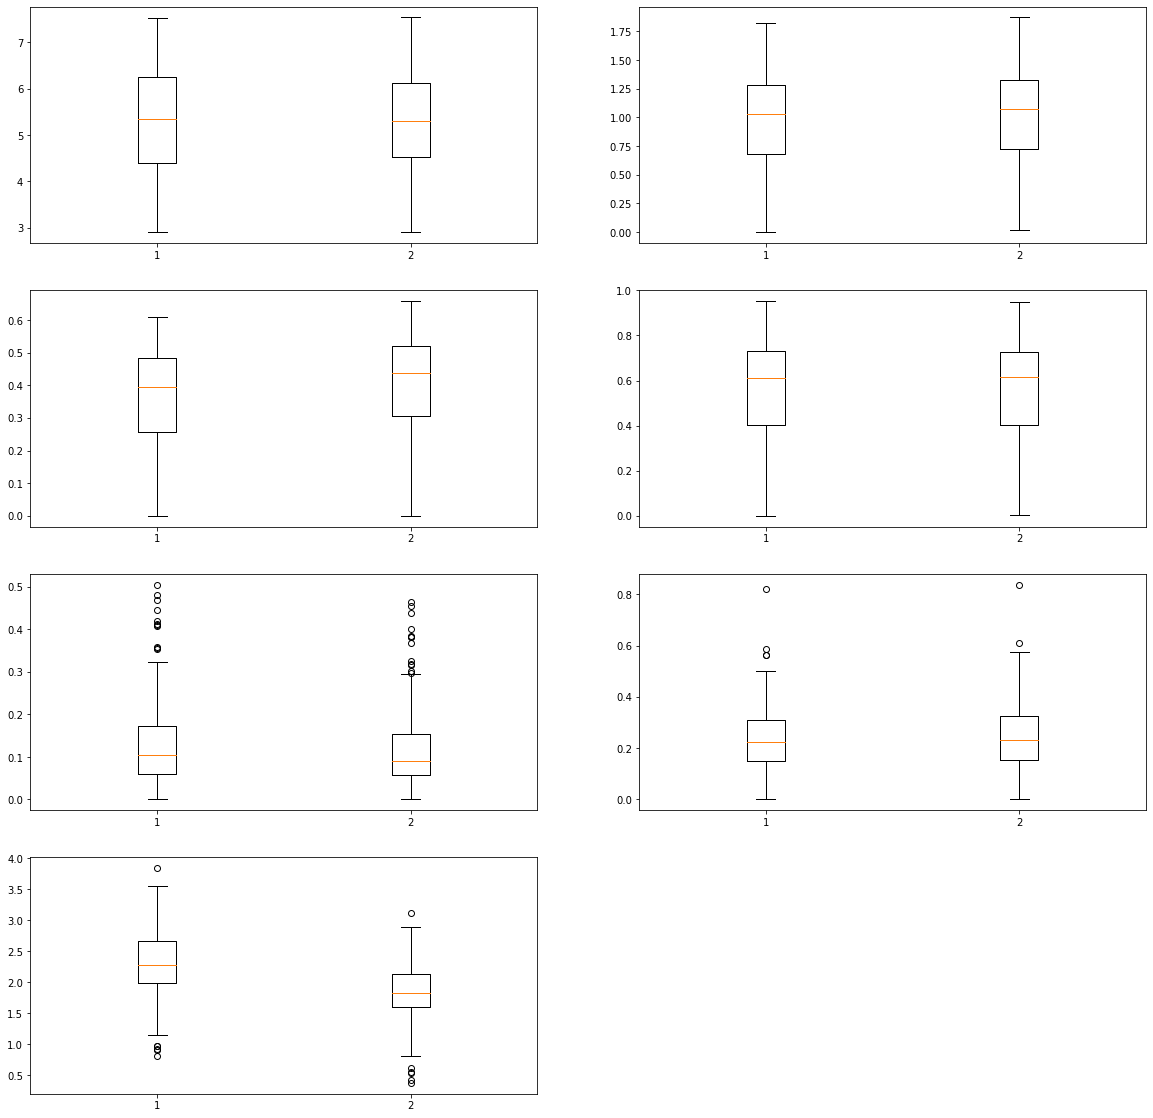

In [158]:
fig, axes = plt.subplots(4,2)
axes[0,0].boxplot([happy_compare_clean['Happiness_Score_2016'],happy_compare_clean['Happiness_Score_2017']])
axes[0,1].boxplot([happy_compare_clean['Economy_GDP_per_Capita_2016'],happy_compare_clean['Economy_GDP_per_Capita_2017']])
axes[1,0].boxplot([happy_compare_clean['Freedom_2016'],happy_compare_clean['Freedom_2017']])
axes[1,1].boxplot([happy_compare_clean['Health_Life Expectancy_2016'],happy_compare_clean['Health_Life Expectancy_2017']])
axes[2,0].boxplot([happy_compare_clean['Trust_Government_Corruption_2016'],happy_compare_clean['Trust_Government_Corruption_2017']])
axes[2,1].boxplot([happy_compare_clean['Generosity_2016'],happy_compare_clean['Generosity_2017']])
axes[3,0].boxplot([happy_compare_clean['Dystopia_Residual_2016'],happy_compare_clean['Dystopia_Residual_2017']])
fig.delaxes(axes[3,1])

# FIND CORRELATIONS<a id='find_corr'></a>

In the following section, we would like to see how happniess affect the athletes of each country performance in the Olympic Games.

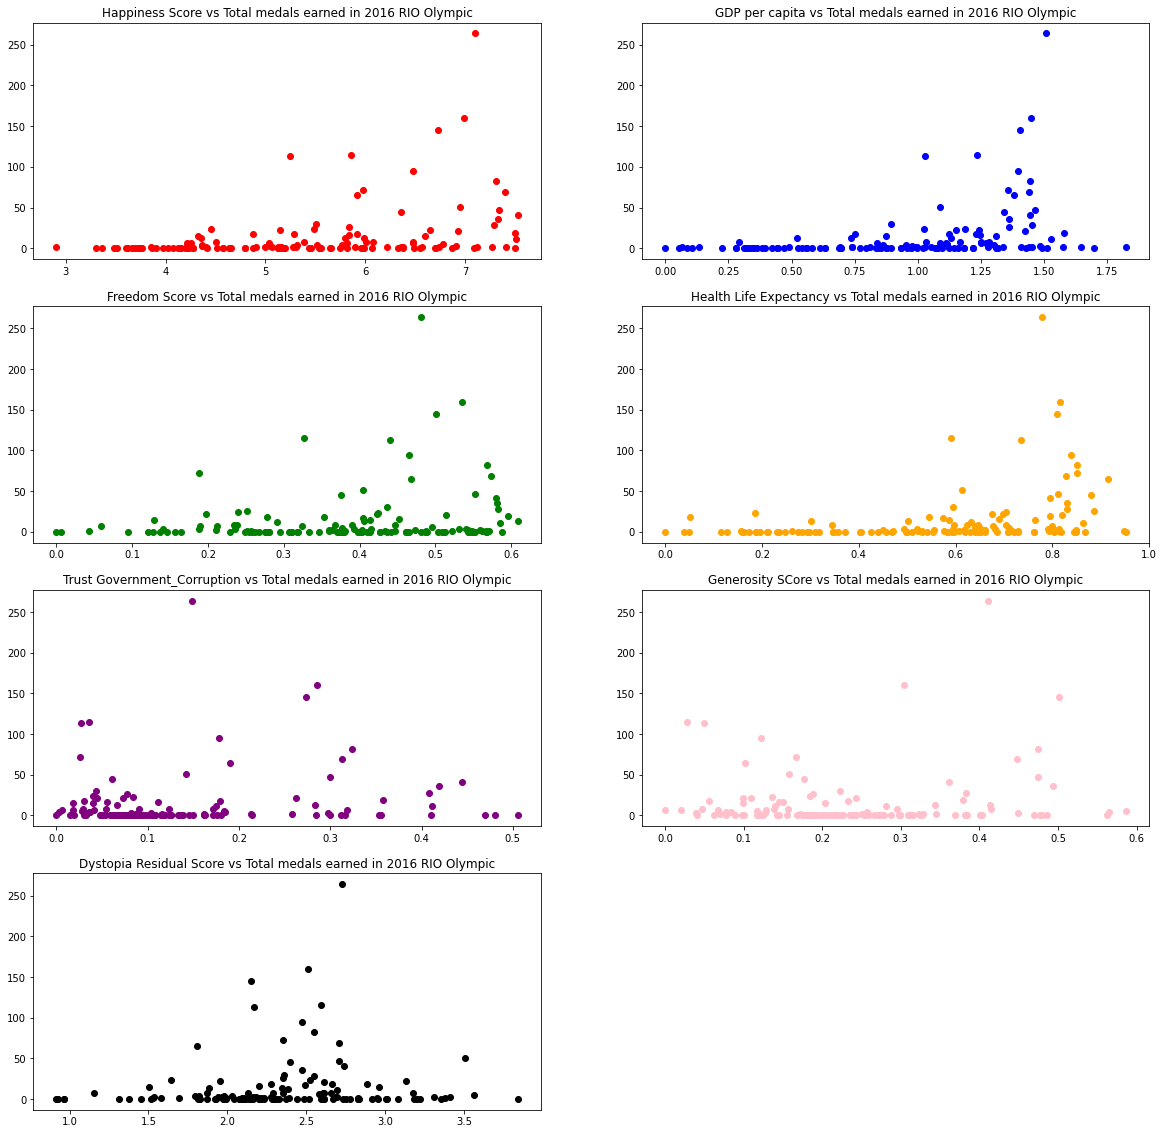

In [62]:
plt.rc('figure', figsize=(20,20))
fig, axes = plt.subplots(4,2)
axes[0,0].scatter(olympic_corr_clean['Happiness_Score_2016'],olympic_corr_clean['total_medals'],c='r')
axes[0,0].set_title('Happiness Score vs Total medals earned in 2016 RIO Olympic')
axes[0,1].scatter(olympic_corr_clean['Economy_GDP_per_Capita_2016'],olympic_corr_clean['total_medals'],c='b')
axes[0,1].set_title('GDP per capita vs Total medals earned in 2016 RIO Olympic')
axes[1,0].scatter(olympic_corr_clean['Freedom_2016'],olympic_corr_clean['total_medals'],c='g')
axes[1,0].set_title('Freedom Score vs Total medals earned in 2016 RIO Olympic')
axes[1,1].scatter(olympic_corr_clean['Health_Life Expectancy_2016'],olympic_corr_clean['total_medals'],c='orange')
axes[1,1].set_title('Health Life Expectancy vs Total medals earned in 2016 RIO Olympic')
axes[2,0].scatter(olympic_corr_clean['Trust_Government_Corruption_2016'],olympic_corr_clean['total_medals'],c='purple')
axes[2,0].set_title('Trust Government_Corruption vs Total medals earned in 2016 RIO Olympic')
axes[2,1].scatter(olympic_corr_clean['Generosity_2016'],olympic_corr_clean['total_medals'],c='pink')
axes[2,1].set_title('Generosity SCore vs Total medals earned in 2016 RIO Olympic')
axes[3,0].scatter(olympic_corr_clean['Dystopia_Residual_2016'],olympic_corr_clean['total_medals'],c='black')
axes[3,0].set_title('Dystopia Residual Score vs Total medals earned in 2016 RIO Olympic')
fig.delaxes(axes[3,1])

From the above scatter plot, we can see there are possibly correlation for Happiness Score/GDP/Freedom/Health of a country and the amount of medal they can get in the Olympics. However, for Government Trust/Generosity/Dystopia Residual Score, we cannot observe any relation.

## Pearson Correlation Test

In [68]:
factor_list=['Happiness_Score_2016',
             'Economy_GDP_per_Capita_2016',
             'Freedom_2016',
             'Health_Life Expectancy_2016',
             'Trust_Government_Corruption_2016',
             'Generosity_2016',
             'Dystopia_Residual_2016']
corr=[]
for i in range(len(factor_list)):
    corr.append(pearsonr
                (olympic_corr_clean[factor_list[i]],
                 olympic_corr_clean['total_medals']))
df=pd.DataFrame(corr,index=factor_list,columns=['correlation coefficient','p-value'])
df.style.set_caption('Correlation of different factors with total number of medals')

,correlation coefficient,p-value
Happiness_Score_2016,0.354049,0.000025
Economy_GDP_per_Capita_2016,0.340695,0.000053
Freedom_2016,0.180498,0.036177
Health_Life Expectancy_2016,0.317100,0.000179
Trust_Government_Corruption_2016,0.133911,0.121522
Generosity_2016,0.103263,0.233326
Dystopia_Residual_2016,0.105453,0.223506


The above table showing the result of Pearson correlation test result. Pearson correlation coefficient tells us that there are slight positive correlation between happiness score/GDP/Health of the country with repect to the numbers of medal they can get in the Olympics. Furthermore, we check the p-value. We set our level of significant to 0.05 in this case. We can also conclude that the result above is statistical significance because the p-value for those results are less than the level of significance. 

The below part is to see how the being the Host of the Olympic Game (In 2016, it is Brazil) will affect themselves.
First, we take a look at their happiness score in 2016 and 2017 and produce a column of the difference in between two years.

In [120]:
olympic_corr_clean['Happy_diff']=olympic_corr_clean['Happiness_Score_2017']-olympic_corr_clean['Happiness_Score_2016']

<ipython-input-120-87bfeaa7c1d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic_corr_clean['Happy_diff']=olympic_corr_clean['Happiness_Score_2017']-olympic_corr_clean['Happiness_Score_2016']


In [137]:
olympic_sorted_happ=olympic_corr_clean.sort_values(by='Happy_diff',ascending=False,ignore_index=True)
olympic_sorted_happ=olympic_sorted_happ.reindex()
olympic_sorted_happ

,nationality,gold,silver,bronze,total_medals,country,code,population,gdp_per_capita,Country,...,Lower_Confidence_Interval_2017,Economy_GDP_per_Capita_2017,Family_2017,Health_Life Expectancy_2017,Freedom_2017,Generosity_2017,Trust_Government_Corruption_2017,Dystopia_Residual_2017,Happy_diff,GDP_diff
0,BUL,0,1,6,7,Bulgaria,BUL,7177991.0,6993.477360,Bulgaria,...,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139,0.497,0.048399
1,AFG,0,0,0,0,Afghanistan,AFG,32526562.0,594.323081,Afghanistan,...,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,0.434,0.019207
2,EGY,0,0,3,3,Egypt,EGY,91508084.0,3614.746766,Egypt,...,4.644866,0.989702,0.997471,0.520187,0.282110,0.128631,0.114381,1.702161,0.373,0.035752
3,RSA,2,7,14,23,South Africa,RSA,54956920.0,5723.973357,South Africa,...,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,0.370,0.030539
4,GAB,0,0,0,0,Gabon,GAB,1725292.0,8266.445605,Gabon,...,4.372639,1.198210,1.155620,0.356579,0.312329,0.043785,0.076047,1.322916,0.344,0.039700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,BRA,37,8,6,51,Brazil,BRA,207847528.0,8538.589975,Brazil,...,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267,-0.317,0.019813
131,TAN,0,0,0,0,Tanzania,TAN,53470420.0,878.975106,Tanzania,...,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,-0.317,0.039586
132,ZIM,0,0,0,0,Zimbabwe,ZIM,15602751.0,924.143819,Zimbabwe,...,3.771300,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,-0.318,0.025437
133,HAI,0,0,0,0,Haiti,HAI,10711067.0,818.343298,Haiti,...,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,-0.425,0.027640


In [138]:
olympic_sorted_happ[olympic_sorted_happ['country']=='Brazil'][['country',
                    'Happiness_Score_2016',
                    'total_medals',
                    'Happiness_Score_2017',
                    'Happy_diff']].head()

,country,Happiness_Score_2016,total_medals,Happiness_Score_2017,Happy_diff
130,Brazil,6.952,51,6.635,-0.317


We can see that Brazil is a the 130th place which means the the people in Brazil is getting more sad than most of the countries after the Olympic Game.

In [145]:
olympic_sorted_happ[olympic_sorted_happ['country']=='United States'][['country',
                    'Happiness_Score_2016',
                    'total_medals',
                    'Happiness_Score_2017',
                    'Happy_diff']].head()

,country,Happiness_Score_2016,total_medals,Happiness_Score_2017,Happy_diff
110,United States,7.104,264,6.993,-0.111


We also take a look at the United States. Being the most medal winning country in Rio 2016, USA seems to be less happy in 2017.

And now we also want to see how the GDP different after being a host of the olympic game.

In [139]:
olympic_corr_clean['GDP_diff']=olympic_corr_clean['Economy_GDP_per_Capita_2017']-olympic_corr_clean['Economy_GDP_per_Capita_2016']

<ipython-input-139-b28fa28f038e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic_corr_clean['GDP_diff']=olympic_corr_clean['Economy_GDP_per_Capita_2017']-olympic_corr_clean['Economy_GDP_per_Capita_2016']


In [140]:
olympic_sorted_gdp=olympic_corr_clean.sort_values(by='GDP_diff',ascending=False,ignore_index=True)
olympic_sorted_gdp=olympic_sorted_gdp.reindex()
olympic_sorted_gdp

,nationality,gold,silver,bronze,total_medals,country,code,population,gdp_per_capita,Country,...,Lower_Confidence_Interval_2017,Economy_GDP_per_Capita_2017,Family_2017,Health_Life Expectancy_2017,Freedom_2017,Generosity_2017,Trust_Government_Corruption_2017,Dystopia_Residual_2017,Happy_diff,GDP_diff
0,MLI,0,0,0,0,Mali,MLI,17599694.0,724.256283,Mali,...,4.110329,0.476180,1.281473,0.169366,0.306614,0.183354,0.104970,1.668191,0.117,0.163260
1,MAW,0,0,0,0,Malawi,MAW,17215232.0,371.985748,Malawi,...,3.862521,0.233442,0.512569,0.315090,0.466915,0.287170,0.072712,2.081786,-0.186,0.146352
2,GEO,2,1,4,7,Georgia,GEO,3679000.0,3795.973308,Georgia,...,4.197066,0.950613,0.570615,0.649547,0.309410,0.054009,0.251667,1.500138,0.034,0.112693
3,KAZ,3,5,9,17,Kazakhstan,KAZ,17544126.0,10509.981070,Kazakhstan,...,5.734358,1.284556,1.384369,0.606042,0.437454,0.201964,0.119283,1.784893,-0.100,0.055126
4,ISL,0,0,0,0,Iceland,ISL,330823.0,50173.339916,Iceland,...,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.003,0.053973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,LBR,0,0,0,0,Liberia,LBR,4503438.0,455.873935,Liberia,...,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,-0.089,0.011982
131,ANG,0,0,0,0,Angola,ANG,25021974.0,4101.472152,Angola,...,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,-0.071,0.011118
132,SLE,0,0,0,0,Sierra Leone,SLE,6453184.0,653.131816,Sierra Leone,...,4.567357,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,2.668460,0.074,0.003571
133,JOR,1,0,0,1,Jordan,JOR,7594547.0,4940.045836,Jordan,...,5.223590,0.991012,1.239089,0.604590,0.418421,0.172170,0.119803,1.791177,0.033,-0.005718


In [144]:
olympic_sorted_gdp[olympic_sorted_gdp['country']=='Brazil'][['country',
                    'Economy_GDP_per_Capita_2017',
                    'total_medals',
                    'Economy_GDP_per_Capita_2017',
                    'GDP_diff']].head()

,country,Economy_GDP_per_Capita_2017,total_medals,Economy_GDP_per_Capita_2017,GDP_diff
126,Brazil,1.107353,51,1.107353,0.019813


We can see that Brazil is in 126th place of the change in GDP. It is showing that even hosting one of the biggest worldwide sports event in the country, there is not much of a economics growth for this country in the case of Rio 2016 Olympics.